In [7]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget
#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import okada_kl_subfaults as okl
import matplotlib.pyplot as plt
import numpy as np

In [9]:
E_subfault=10
N_subfault=10

km = 1000.0
depth=32*km
length=300*km
width=150*km
strike=195.0
dip=14.0
rake=87.0

slip = 20.0

epicenters_E, epicenters_N, epicenters_D = okl.subfaults(E_subfault, N_subfault, dip, strike, length, width)

#print(epicenters_E)

In [39]:
def kl_slipfield(epicenters_E, epicenters_N, epicenters_D, length, width, slip, iseed=1001):

    from math import exp, sqrt
    from numpy import linalg as LA

    n,m = epicenters_E.shape

    vector_E = epicenters_E.flatten()
    vector_N = epicenters_N.flatten()
    vector_D = epicenters_D.flatten()

    N=len(vector_E)
    C_hat=np.zeros((N,N),dtype=float)

    #print(C_hat)

    mu=slip

    # parameters to define correlation function
    alpha=0.75
    sigma=alpha*mu
    r0=0.2*width

    for i in range(N):
        for j in range(N):
            K = sqrt((vector_E[i]-vector_E[j])**2 + (vector_N[i]-vector_N[j])**2 + (vector_D[i]-vector_D[j])**2)
            C_hat[i,j] = sigma**2 * exp(-K/r0)

    #print(C_hat)
    
    D,V = LA.eig(C_hat)

    idx = D.argsort()[::-1]
      
    D = D[idx]
    V = V[:,idx]
    D = np.diag(D)
    sqrtD = np.sqrt(D)

    np.random.seed(iseed)
    z=np.random.normal(size=(N,1))

    #print(mu)
    #print(z)

    s = mu + np.dot(V,np.dot(sqrtD,z))

    s = np.reshape(s,(n,m))

    return s, D, V, z, C_hat



In [18]:
slips, D, V, z, C_hat = okl.kl_slipfield(epicenters_E, epicenters_N, epicenters_D, length, width, slip)

## the eigenvvectors are not orthogonal to constant vector.
from numpy import linalg as LA
D,V = LA.eigh(C_hat)
print(V.shape)
print(C_hat.shape)

from numpy.linalg import norm

print(norm(C_hat - C_hat.T))

for i in range(100):
    s = V[:,i].sum()

    if np.abs(s) > 1e-10:
        print(i, s)
        #plt.matshow(V[:,i].reshape(10,10))

(100, 100)
(100, 100)
0.0
11 0.005916724793983932
13 0.011197643474420135
15 -0.01649234314853361
17 -0.025189387111579337
19 -0.06787080125027833
31 0.013879741407364199
33 -0.026981878440313814
35 0.0413936701044951
37 0.06612986277286888
41 -0.18434587614418593
47 -0.028264718082692333
52 -0.0574657727858949
57 -0.0944314533704955
62 -0.03714001327504054
63 0.16943549095759008
68 0.4907974381997804
72 0.13165192410449536
73 -0.1657064377493946
81 -0.2379224442038194
83 -0.42011856233124417
87 0.5065406558129198
90 -1.639424511513525
92 -1.0448442719641382
97 2.422156937534899
99 -9.459841969862715


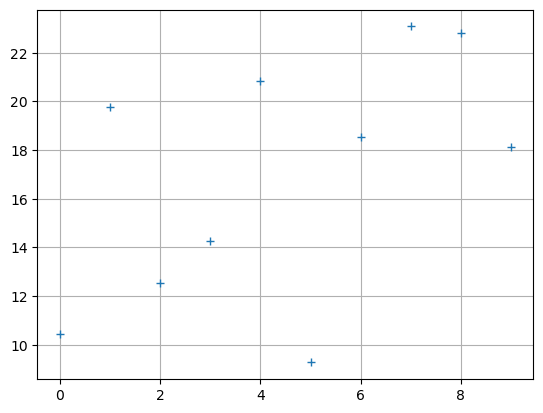

In [24]:
slip=20.0
opening=10.0

aver = []
for i in range(10):
        slips, D, V, z, C_hat = okl.kl_slipfield(epicenters_E, epicenters_N, epicenters_D, length, width, slip)
        #print(slips)
        #print(np.average(slips))
        aver.append(np.average(slips))
plt.plot(aver,'+')
plt.grid(True)


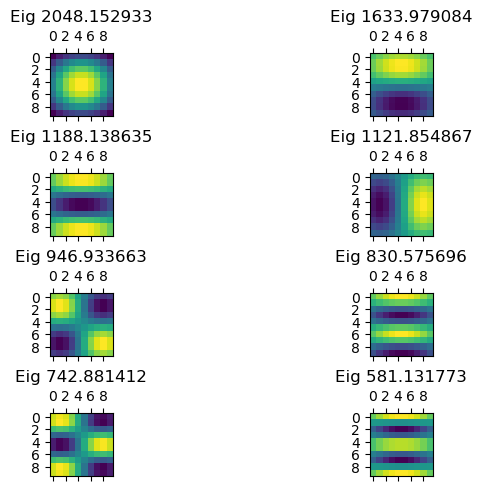

In [25]:
nr = 4
nc = 2
fig, axs = plt.subplots(nr, nc, constrained_layout=True)

axs
for i in range(nr):
    for j in range(nc):
        axs[i,j].matshow(V[:,nc*i+j].reshape(10,10))
        axs[i,j].set_title('Eig %f'% D[nc*i+j,nc*i+j])

In [29]:
extent = 500000
n_extent = 101

#[epicenters_E, epicenters_N, epicenters_D]=newsubfaults(E_subfault,N_subfault, dip, strike, L, W);

#x_subfaults=N_subfault*E_subfault;

# Grid
xvec = np.linspace(-extent,extent,n_extent)
yvec = np.linspace(-extent,extent,n_extent)
x,y = np.meshgrid(xvec,yvec)

uE,uN,uZ, _ = okl.kl_deformation(x, y, xoff=0, yoff=0, E_subfault=10, N_subfault=10)

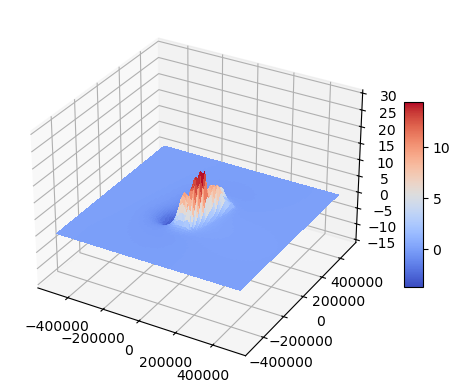

In [30]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x,y,uZ, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(-15, 30.0)
ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

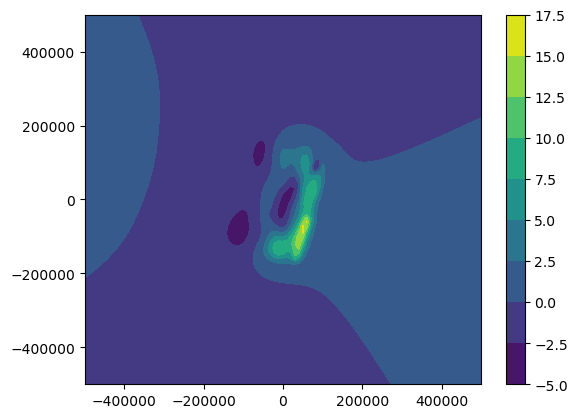

In [31]:
plt.contourf(x,y,uZ)
plt.colorbar()


